In [4]:
import numpy as np
from qiskit import *
from math import sqrt, pi
#preparing the state coeffs
a = np.random.rand(1) + 1j * np.random.rand(1)
b = np.random.rand(1) + 1j * np.random.rand(1)
tnorm = sqrt(np.abs(a)**2 + np.abs(b)**2)
a = a / tnorm
b = b / tnorm

psi = np.angle(a)
a = a * np.exp(-1j * psi)
b = b * np.exp(-1j * psi)
#print(a,b)

phi = np.angle(b)
theta  = 2 * np.arctan2(np.abs(b),np.abs(a))
print('theta = ',theta,', phi = ', phi)

theta =  [1.99461245] , phi =  [1.32472529]


In [5]:
with open('Qconfig_IBMQ_experience.py', 'r') as token_file:
    token = token_file.read()
IBMQ.save_account(token, overwrite = True)
IBMQ.load_account()
my_provider = IBMQ.get_provider()

qr = QuantumRegister(1)
cr = ClassicalRegister(1)
circuit = QuantumCircuit(qr, cr)

state0 = [0,0]
state0[0] = complex(a)
state0[1] = complex(b)
print(state0)
circuit.initialize(state0, qr)
circuit.h(0)
circuit.measure(qr,cr)

backend=Aer.get_backend('qasm_simulator')
jobIBM=execute(circuit,backend=backend,shots=1024)
resultSim=jobIBM.result()

backend  = my_provider.get_backend('ibmq_valencia')
jobIBM=execute(circuit,backend=backend,shots=1024)
resultExp=jobIBM.result()

from qiskit.tools.visualization import plot_histogram
#plot_histogram([resultSim.get_counts(circuit)])
plot_histogram([resultExp.get_counts(circuit),resultSim.get_counts(circuit)])

rsim = resultSim.get_counts(circuit)
a2sim = rsim['0'] / (rsim['0'] + rsim['1'])
cos_phi1 = (2*a2sim-1)/(np.sin(theta))
newphi1 = np.arccos(cos_phi1)

rexp = resultExp.get_counts(circuit)
a2exp = rexp['0'] / (rexp['0'] + rexp['1'])
cos_phi2 = (2*a2exp-1)/(np.sin(theta)) #the explanation is on google disk link
newphi2 = np.arccos(cos_phi2)
#due to cos being even, we can't get the sign of phi through a single circuit
print('real phi = ',phi, ', obtained phi = ',newphi1, newphi2)


C:\ProgramData\Anaconda3\lib\site-packages\qiskit\providers\ibmq\ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '
ibmqfactory.load_account:WARNING:2020-09-25 16:13:27,061: Credentials are already in use. The existing account in the session will be replaced.


[(0.5425670782127385-6.938893903907228e-18j), (0.20462303959524938+0.8147087683991704j)]
real phi =  [1.32472529] , obtained phi =  [1.29742418] [1.09203518]


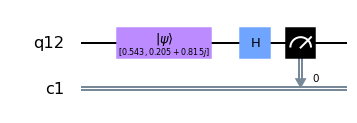

In [6]:
circuit.draw(output = 'mpl')